In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
points = []
def initializePoints(count):
     for i in range(int(count/3)):
         points.append([random.gauss(0,10),random.gauss(100,10)])
     for i in range(int(count/3)):
         points.append([random.gauss(-30,20),random.gauss(10,10)])
     for i in range(int(count/3)):
         points.append([random.gauss(30,20),random.gauss(10,10)])

     return points


In [3]:
def find_centroid(pts):
    if len(pts) == 0: #if in an usual case we have zero points in a clusters, this stops the code from breaking done.
        return np.array([[0,0,0]])
    n = len(pts)
    components = [sum([pt[i] for pt in pts])/n for i in range(len(pts[0]))]
    return np.array(components)


In [4]:
def significant_difference(old, new, significant = 1):
    for i in range(len(old)):
        if np.linalg.norm(old[i] - new[i]) > significant:
            return True
    return False

In [5]:
def cluster(points,K,visuals = True):
    points = [np.array(i) for i in points]
    centroids = [random.choice(points) for _ in range(K)] #randomly choosing points as centroids
    run = True
    count = 1 #iteration count
    while run:
        clusters = [[] for _ in range(K)] #emptying the clusters
        for point in points:
            dist = [np.linalg.norm(point-centroid) for centroid in centroids] #euclidiean distance with all centroids
            clust = np.where(dist == np.amin(dist))[0][0] #clostest centroid
            clusters[clust].append(point)
            
        new_centroids = [find_centroid(cluster) for cluster in clusters] #finding new centroids
        
        run = significant_difference(centroids, new_centroids, 0.5) 

        
        if visuals:
            num = 0
            for cluster in clusters:
                plt.scatter(*(zip(*cluster)), label = 'Cluster ' + str(num + 1))
                num += 1
            if centroids:
                plt.scatter(*(zip(*centroids)), marker = "+", label = 'centroid', color = 'black')
                plt.title("iteration "+ str(count))
                plt.legend()
                plt.show()
        
        centroids =  new_centroids
        count += 1
        
        
             
    #Your kmeans code will go here to cluster given points in K clsuters. If visuals = True, the code will also plot graphs to show the current state of clustering
    
    return clusters

In [6]:
def clusterQuality(clusters):
    score = 0
    centroids = [find_centroid(cluster) for cluster in clusters]
    for cluster_num, cluster in enumerate(clusters):
        for point in cluster:
            score += (np.linalg.norm(point - centroids[cluster_num]))**2 #SSE
    
    return score

In [7]:
def keepClustering(points,K,N,visuals):
    clusters = cluster(points, K, visuals)
    score = clusterQuality(clusters)
    scores = [score]
    for _ in range(N-1):
        cur_cluster = cluster(points, K, visuals)
        cur_score = clusterQuality(cur_cluster)
        scores.append(cur_score)
        if cur_score < score:
            score = cur_score
            clusteres = cur_cluster
     #umcomment to see changing SSE       
    #plt.plot(range(N), scores)
    #plt.show()
    
    
    return clusters
    

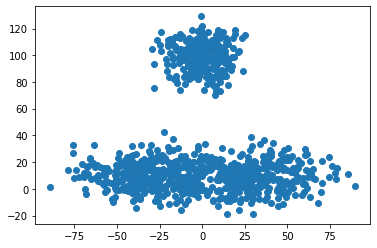

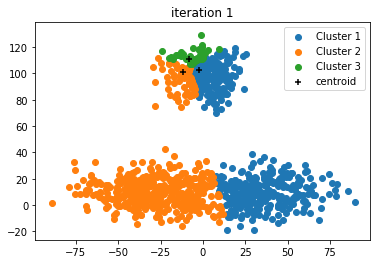

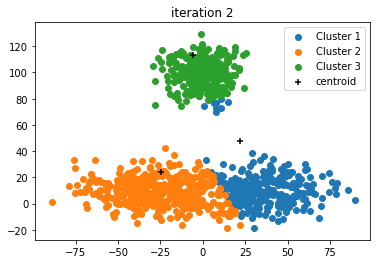

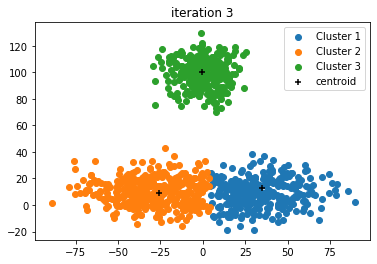

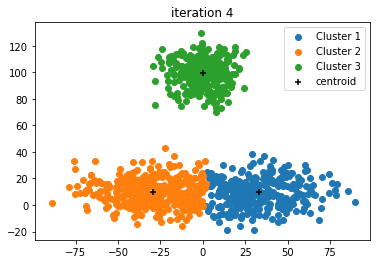

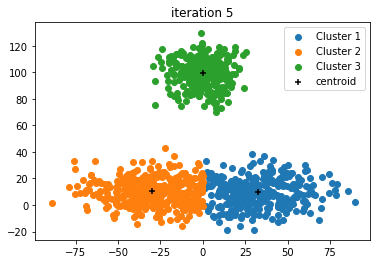

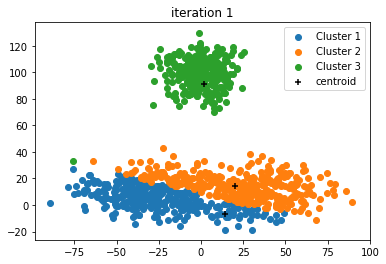

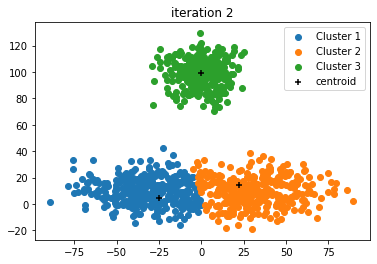

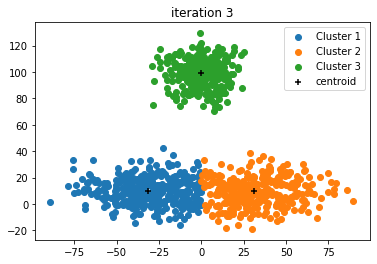

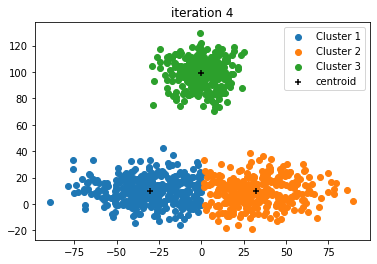

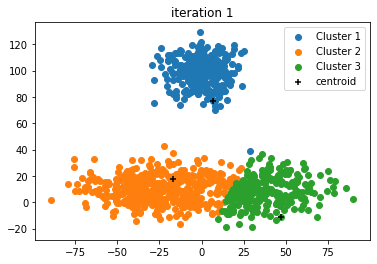

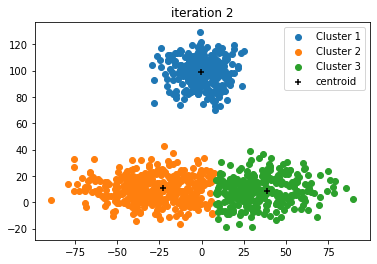

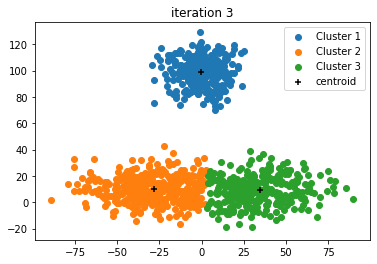

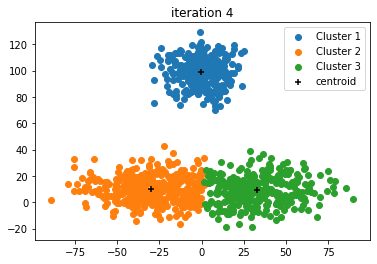

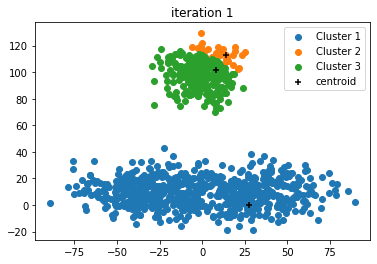

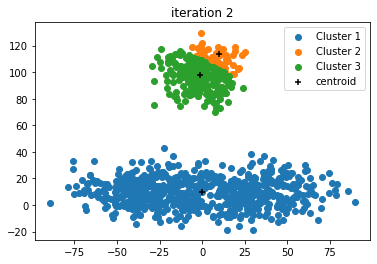

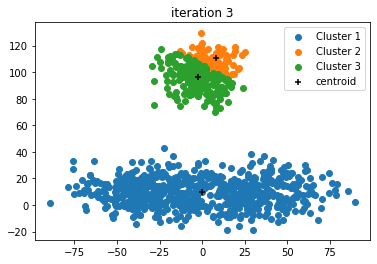

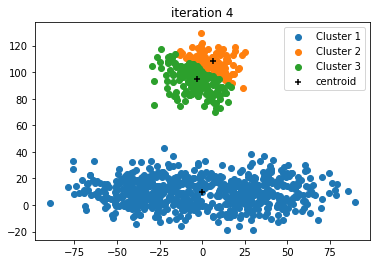

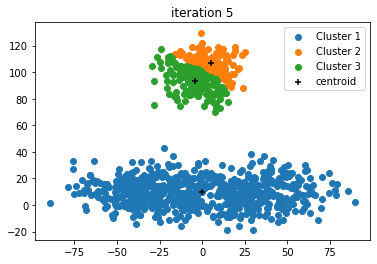

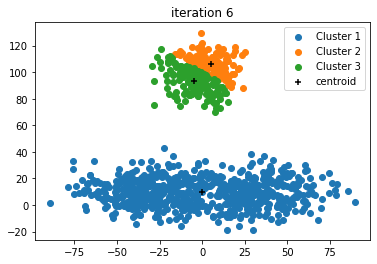

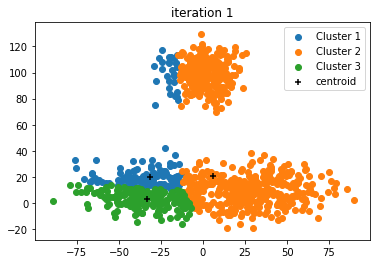

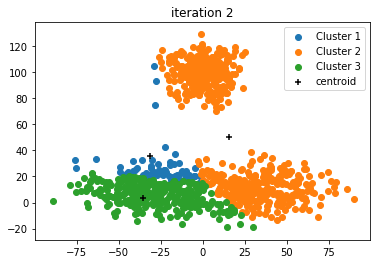

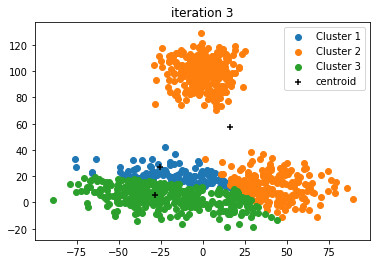

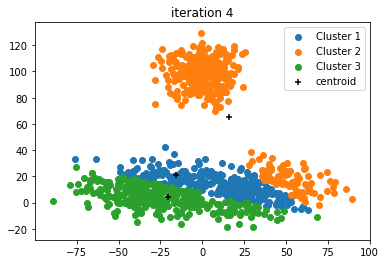

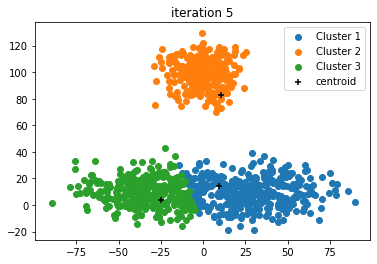

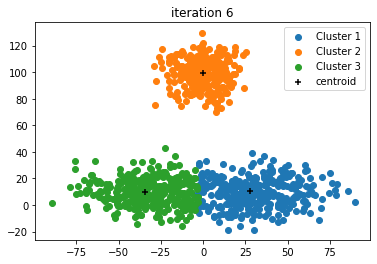

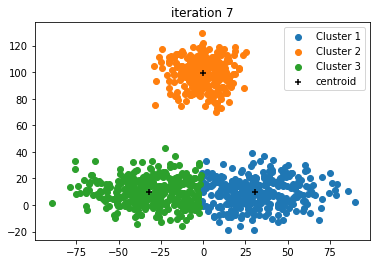

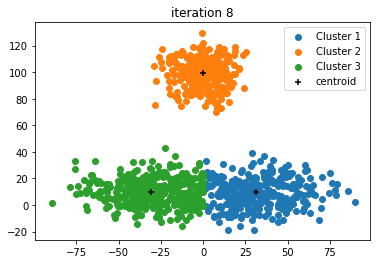

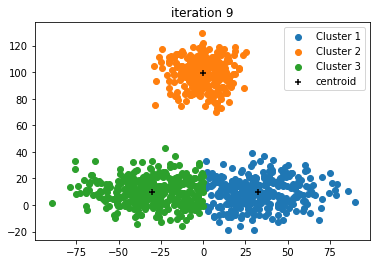

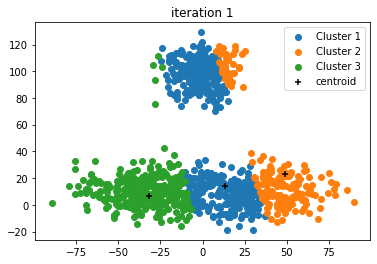

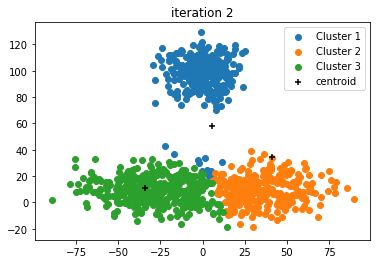

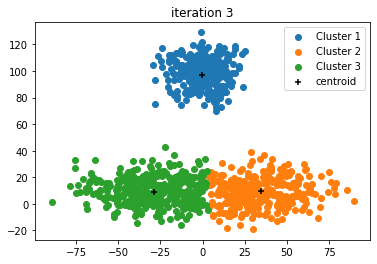

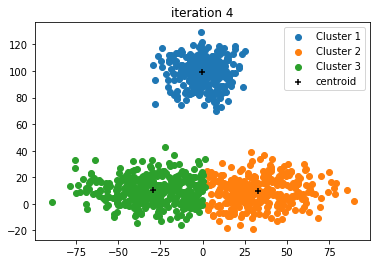

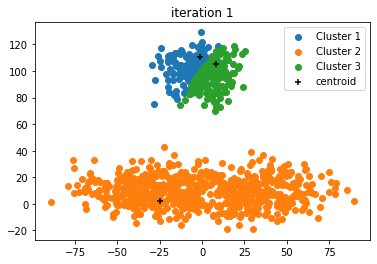

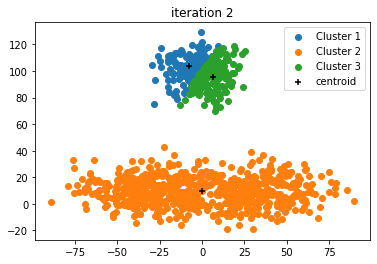

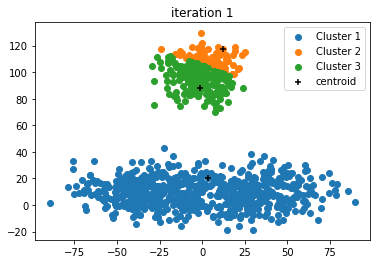

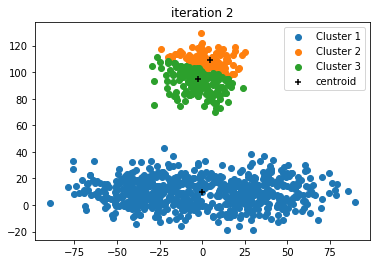

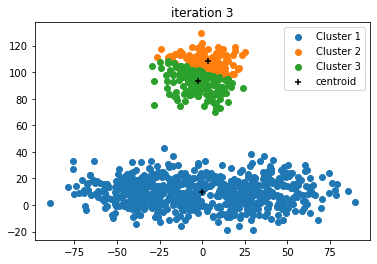

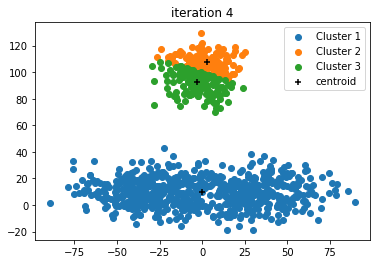

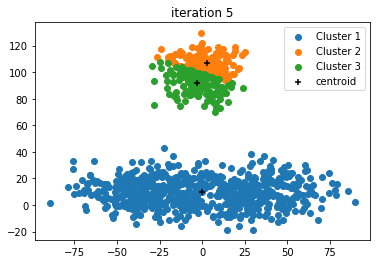

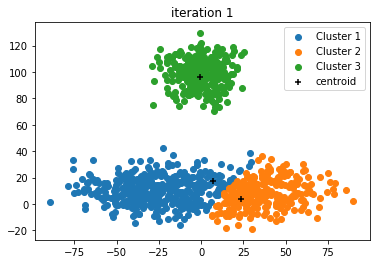

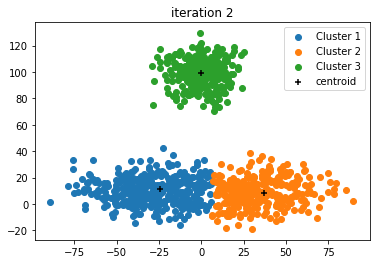

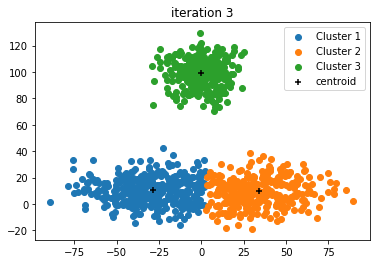

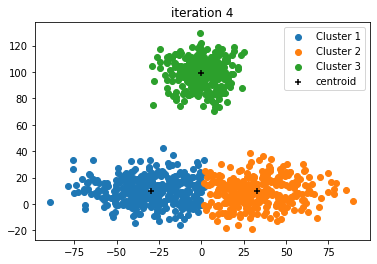

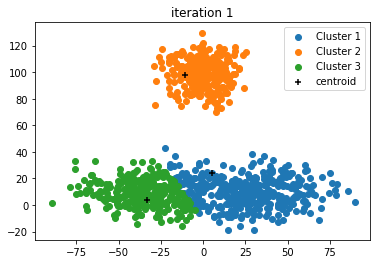

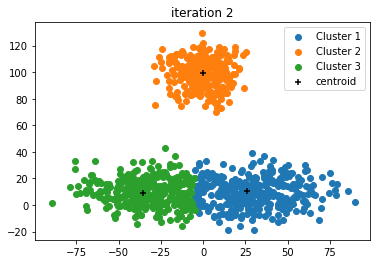

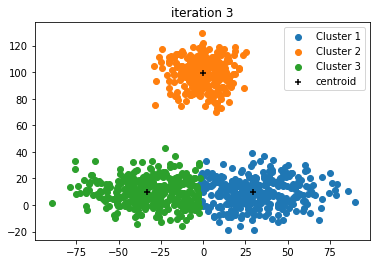

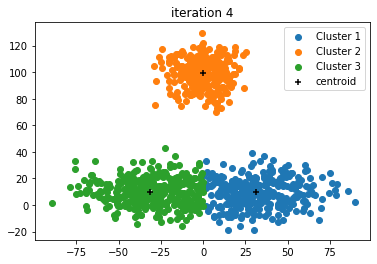

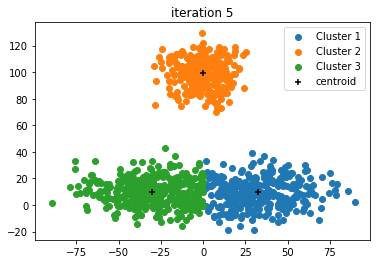

The score of best Kmeans clustering is: 362663.06589002354


In [8]:
K = 3
N = 10
points = initializePoints(1000)

plt.scatter(*(zip(*points)))
plt.show()

#clusters = cluster(points,K,visuals = True)

clusters = keepClustering(points,K,N,True)

print ("The score of best Kmeans clustering is:", clusterQuality(clusters))
